<a href="https://colab.research.google.com/github/JulioManoel/FACENS/blob/main/7%C2%B0%20Semestre/Processamento%20de%20Imagens/aula2_opencv_tin3ter_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6"><center>Centro Universitário Facens</center></font><br/>
<br/>
<font size="4"><center><b>Disciplina: Processamento de Imagens</b></center></font>
  
<font size="3"><center>Prof. Dr. Renato Moraes Silva</center></font>
<br/>

# <center>Exercício - Introdução à biblioteca OpenCV</center>

Neste exercício, são apresentados alguns recursos básicos da biblioteca OpenCV.

0Para instalar a biblioteca OpenCV no sistema operacional Ubuntu, use o comando ```sudo apt-get install python3-opencv```.

Além disso, é preciso instalar a biblioteca no Python, por meio do comando ```pip install opencv-python```.

Abaixo, iremos importar as bibliotecas que serão usadas.

In [73]:
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import os
import urllib.request
import matplotlib.pyplot as plt # para plotar as imagens

# Importanto uma imagem em tons de cinza

Primeiro, iremos fazer o download de uma imagem.

In [74]:
pathFolder = 'figs/'

# verifica que a pasta existe
if not os.path.exists(pathFolder):
    # cria a pasta
    os.makedirs(pathFolder)

url = 'https://i.dailymail.co.uk/i/pix/2012/06/22/article-2163232-13BB4A21000005DC-80_634x472.jpg'

urllib.request.urlretrieve(url, pathFolder + "gatoVaca.png")

('figs/gatoVaca.png', <http.client.HTTPMessage at 0x7b34283704f0>)

Iremos importar a imagem da pasta figs em tons de cinza. Para isso, é necessário usar a função *imread*, passando o path da imagem e 0 como argumento.

In [75]:
img = cv2.imread('figs/gatoVaca.png', 0)

print('Linhas: ', img.shape[0])
print('Colunas: ', img.shape[1])

if len(img.shape) < 3: print('1 canal de cor')
else: print('%d canais de cores' %(img.shape[2]))

Linhas:  472
Colunas:  634
1 canal de cor


Para mostrar a imagem na tela, podemos usar a função *imshow()* da biblioteca OpenCV.

E devemos acrescentar também:

```
cv2.waitKey(0) # espera até que um tecla seja pressionada
cv2.destroyAllWindows() # destrói a janela onde a imagem está sendo exibida
```

No entanto, exibir a imagem usando OpenCV pode travar o notebook. Portanto, é melhor usar a função imgshow da biblioteca *matplotlib*, passando 'gray', vmin=0 e vmax=255 como argumentos.

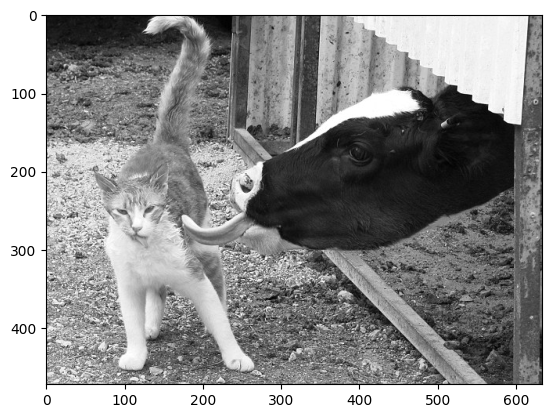

[[20 24 22 19 21]
 [25 28 24 20 23]
 [26 27 22 18 22]
 [22 23 18 15 20]
 [20 22 18 16 22]]


In [76]:
plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.show()

print(img[0:5, 0:5])

# Importanto uma imagem em BGR

Agora, iremos importar uma imagem da pasta figs usando cores. É importante notar que a biblioteca OpenCV importa as imagens com o formato BGR. Portanto, para algumas tarefas será necessário converter para RGB, por meio da função *cvtColor*, usando o argumento *cv2.COLOR_BGR2RGB*.

In [77]:
img2 = cv2.imread('figs/gatoVaca.png')

print('Linhas: ', img2.shape[0])
print('Colunas: ', img2.shape[1])

if len(img2.shape) < 3: print('1 canal de cor')
else: print('%d canais de cores' %(img2.shape[2]))

Linhas:  472
Colunas:  634
3 canais de cores


Agora, iremos mostrar a imagem na tela usando a função *imshow* da biblioteca matplotlib

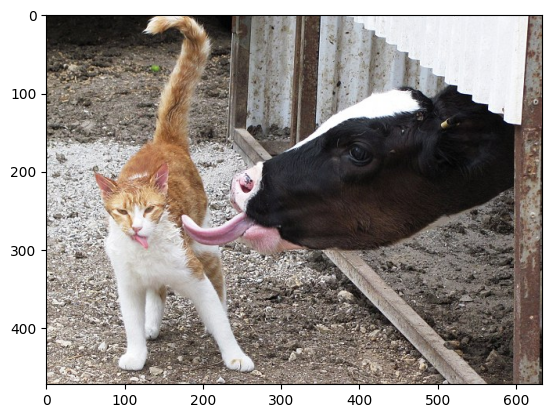

In [78]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.show()

Vamos modificar a imagem acima, adicionando um retângulo preto de 5x5 pixels a cada 20 pixels.

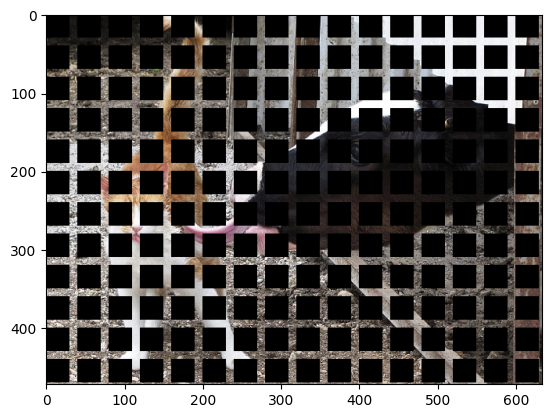

In [79]:
img3 = img2.copy()

largRet = 30
altRet = 30

distancia = 10

largImg = img3.shape[0]
altImg = img3.shape[1]

for i in range(0, largImg, largRet + distancia):
  for j in range(0, altImg, altRet + distancia):
    img3[i:i+largRet, j:j+altRet, :] = [0, 0, 0]

plt.imshow(img3)
plt.show()

A biblioteca OpenCV também permite salvar uma imagem em arquivo, usando qualquer formato desejado. Para isso, basta usar a função *imwrite*, passando o *path* da imagem, seguido pela variável que contém a imagem.

Abaixo, salve a imagem com o nome *gatoVaca_copia.jpg*.

In [80]:
img3 = cv2.cvtColor(img3, cv2.COLOR_RGB2BGR)
cv2.imwrite('figs/gatoVaca_arte.png', img3)

True

É possível também inserir texto nas imagens usando a função **putText** que possui os seguintes parâmetros:
- **img**: imagem
- **text**: texto desejado
- **org**: coordenadas no formato (x,y) onde o texto deve ser inserido
- **fontFace**: o tipo de fonte. Exemplos: FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, FONT_HERSHEY_DUPLEX, etc
- **fontScale**: inteiro que indica a escala da fonte e é usado para aumentar ou diminuir a fonte
- **color**: cor no formato BGR
- **thickness** (opcional): espessura das linha
- **lineType** (opcional): tipo de linha. Opções: FILLED, LINE_4, LINE_8, LINE_AA
- **bottomLeftOrigin** (opcional): o valor False mantém o texto normal, enquanto que o True, inverte o texto

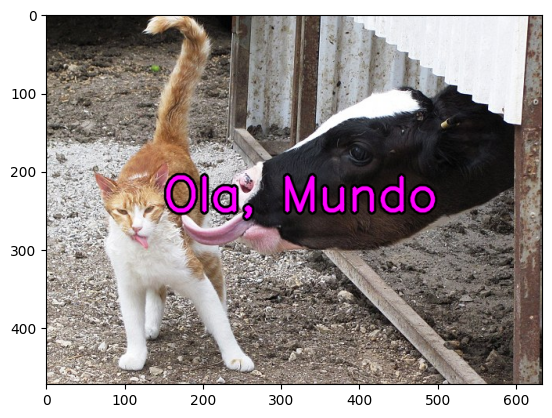

In [95]:
img4 = img2.copy()
img4 = cv2.putText(img4, text = 'Ola, Mundo', org = (150, 250), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 2, color = [0, 0, 0], thickness = 10, lineType = cv2.LINE_AA)
img4 = cv2.putText(img4, text = 'Ola, Mundo', org = (150, 250), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 2, color = [255, 0, 255], thickness = 4, lineType = cv2.LINE_AA)

plt.imshow(img4)
plt.show()

## Exercícios

**Ex. 1**. Use a imagem em tons de cinza e acrescente uma borda preta ao redor dela usando operações matriciais por meio da biblioteca NumPy.

Salve a imagem resultante com o nome *gatoVaca_borda.png* no pasta *figs*.

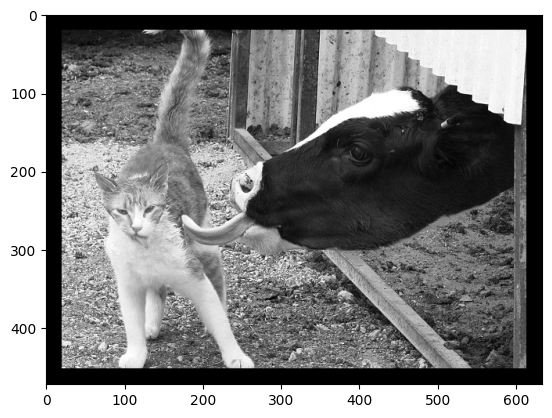

In [113]:
image = cv2.imread('figs/gatoVaca.png', 0)

widthImg = image.shape[0]
heightImg = image.shape[1]

image[0:widthImg, 0:20] = 0
image[0:20, 0:heightImg] = 0
image[0:widthImg, -20:] = 0
image[-20:, 0:heightImg] = 0

cv2.imwrite('figs/gatoVaca_borda.png', image)
plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.show()

**Ex. 2**. Usando a imagem em tons de cinza, crie uma nova imagem com zoom na cabeça da vaca. Isto é, recorte a imagem para que sobre apenas a região onde está a cabeça da vaca.

Salve a imagem resultante com o nome *gatoVaca_zoom.png* no pasta *figs*.

**Ex. 3**. Cri uma imagem com todas as cores RGB